# Introducción
El presente tutorial buscar ilustrar como documentar procesos los distintos pasos a seguir un estudio utilizando datos abiertos, para ello seguiremos las indicaciones generales del Portal de Datos abiertos de la Junta de Andalucía.

![Piensa](http://desarrollov5.juntadeandalucia.es/themes/images/datosabiertos/datosabiertos-1.png)

# Piensa

Lo primero es plantearse una cuestión  sobre la que trabajar, en nuestro caso, vamos a plantearnos analizar como es la distribución de los presupuestos de las administraciones locales respecto a la población.

Identificado el objeto de análisis lo más conveniente es reflejarlo de alguna forma que permita a otros entender que se pretende en el notebook sin tener que recorrer todo el documento hasta las posibles conclusiones.

Bastará con hacer una breve introducción:

> ## Análisis de la Distribución de los presupuestos municipales en función del población.

> En base a los datos que publica la Consejería de la Presidencia y Administración Local de la Junta de Andalucía, quiero analizar si la distribución del presupuesto de gasto está relacionado con la población que vive en el municipio.

>Es importante tener en cuenta que la configuración de los municipios en función de su población vienen dadas por las distintas normas vigentes:
>* Código de Régimen Local http://www.boe.es/legislacion/codigos/abrir_pdf.php?fich=019_Codigo_de_Regimen_Local.pdf
>* Ley 5/2010, de 11 de junio, de Autonomía Local de Andalucía. http://juntadeandalucia.es/boja/2010/122/1



![Descubre](http://desarrollov5.juntadeandalucia.es/themes/images/datosabiertos/datosabiertos-2.png)

# Descubre

La Junta de Andalucía, en su portal de datos abiertos ofrece un conjunto de datos que  permite  comenzar el análisis que nos hemos planteado, su acceso  es:

**.TODO.**

En éste caso, el conjunto de datos únicamente está disponible  en formato ".xls", lo que nos permite  analizar lo  fácilmente con  herramientas como las hojas de cálculo, o como es el caso mediante la utilización de lenguajes de programación.

Por otro lado, la licencia de  los datos es Creative Commons v4.0, por lo  que podemos hacer uso del conjunto de datos únicamente haciendo reconocimiento  e haciendo referencia a la licencia, en éste caso:
https://creativecommons.org/licenses/by/4.0/deed.es_ES


![Desarrolla](http://desarrollov5.juntadeandalucia.es/themes/images/datosabiertos/datosabiertos-3.png)

# Desarrolla

Ya tenemos el conjunto de datos seleccionados, las cuestiones que queremos despejar es el momento de ponernos manos a la obra!.

Recuerda que es importante documentar el proceso no sólo para que otras personas puedan conocer fácilmente el proceso que te ha llevado a las conclusiones, también ayuda a validar el trabajo y generar confianzar sobre los resultados que se obtengan.

En éste caso vamos a seguir unas sencillas fases que en gran medida cubren el proceso general de analisis de información con estas herramientas.

Como podrás ver a continuación los notebooks facilitan mucho la documentación ya que es su objetivo, por ejemplo, puedes documentar el proceso usando celdas "Markdown" donde el formato del texto es más rico (puedes incluir **negrita**, *cursivas*, listas, etc...) e introducir comentarios en el propio código fuente a fin de detallar aspectos puramente técnicos.

Recuerda que en el menú ayuda (HELP) tienes guías rápidas para hacerte con el formato.

>## 3.1 Cargar los datos
>En nuestro caso los datos  vienen en formato abierto, por lo que podemos proceder a su lectura utilizando una libreria libre que pueda adquirirlos

In [89]:
# Leemos el fichero obtenido del portal de datos abiertos, como se encuentra en formato xls
# podemos realizar directamente su lectura
import pandas as pd
df = pd.read_excel("RAEL_DATOS_ENTIDADES.xls")

## _3.2 Exploración de los datos_

Un buen primer paso siempre debemos realizar una revisión básica del conjunto de datos para detectar posibles problemas en la carga. Estos problemas pueden posteriormente afectar al estudio que pretendemos realizar.

También nos ayudará hacernos una mejor idea de las variables que lo conforman y los valores que contienen.

In [90]:
# Revisamos la carga del conjunto de datos extrayendo los primeros registros (5)
df.head()

CLASE_DE_ENTIDAD TIPO_DE_ENTIDAD DENOMINACION TIPO_DE_VIA    NOMBRE_DE_VIA  \
0        MUNICIPIO             NaN         ABLA       PLAZA            MAYOR   
1        MUNICIPIO             NaN     ABRUCENA       PLAZA     DE ANDALUCIA   
2        MUNICIPIO             NaN       ADAMUZ       CALLE           FUENTE   
3        MUNICIPIO             NaN         ADRA       CALLE  PUERTA DEL MAR-   
4        MUNICIPIO             NaN        AGRON       CALLE         SAN JOSE   

  NUMERO  LETRA  ESCALERA PISO PUERTA         ...         BOJA_COMPETENCIA  \
0      6    NaN       NaN  NaN    NaN         ...                      NaN   
1      1    NaN       NaN  NaN    NaN         ...                      NaN   
2      1    NaN       NaN  NaN    NaN         ...                      NaN   
3      3    NaN       NaN  NaN    NaN         ...                      NaN   
4      5    NaN       NaN  NaN    NaN         ...                      NaN   

  FECHA_BOJA_COMPETENCIA  CONFIANZA  ANOTACION_JUDI_ORGANO_JUDICIAL  \
0                    NaN        NaN                             NaN   
1                    NaN        NaN                             NaN   
2                    NaN        NaN                             NaN   
3                    NaN        NaN                             NaN   
4                    NaN        NaN                             NaN   

   ANOTACION_JUDI_DATOS_AFECTADOS ANOTACION_JUDICIAL_RESULTADO  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

  ANOTACION_JUDI_FECHA_SENTENCIA ANOTACION_ORGANO ANOTACION_DATO  \
0                            NaN              NaN            NaN   
1                            NaN              NaN            NaN   
2                            NaN              NaN            NaN   
3                            NaN              NaN            NaN   
4                            NaN              NaN            NaN   

  ANOTACION_RESULTADO  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 48 columns]

En esta primera visión del conjunto de datos podemos observar cosas como:
* que existen 48 variables diferentes en el conjunto;
* las provincias de la variable "PROVINCIA PERTENECE" vienen precedidas  del texto "PROVINCIA "
* que existen carácteres  especiales que se han omitido como "Ñ" o acentos;
* que algunas variables  no se han interpretado  correctamente , como por ejemplo los télefonos que son considerados como números y son mostrados con  notación cientifica;
* que determinadas columnas  muestran  valores  extraños  (NaN);
* que algunos campos incluyen información múltiple, como por ejemplo  sucede en algunos casos con los correos electrónicos
* etc...

Estas cuestiones pueden resultar importantes para nuestro análisis, por ejemplo, podríamos estar intentando filtrar por "Cádiz" y no obtener ningún registro ya que la cadena de téxto con acento no está presente en el conjunto de datos.

Por otro lado, esta exploración inicial ayuda a identificar que información nos puede ser útil para nuestro objetivo. Por es conveniente proceder a extraer el subconjunto de información que contiene los valores que esperamos analizar y que nos permita  tratar los datos de una forma más sencilla.

En este caso  nos interesa conservar:
* Municipios,
* Provincias,
* Extensión,
* Ingresos,
* Gastos y
* Población.

> ## _3.3 Selección y Transformación de los datos_

>Para analizar el gasto municipal no necesitamos todas las variables del conjunto de datos, por lo que en principio sólo sería de interés manejar las columnas que tienen que ver con la identificación del municipio, provincia, población, extensión, gastos e ingresos

>Por otro lado como únicamente nos interesan los municipios voy a seleccionar estos únicamente, para ello filtro por la columna clase de entidad

In [91]:
# Creo un vector de municipios haciendo una comparación directa entre los valores de CLASE_DE_ENTIDAD 
# y la cadena "MUNICIPIO"
filas_de_municipios = df.CLASE_DE_ENTIDAD == "MUNICIPIO"
# Filtramos las columnas que vamos a incluir en el análisis
df_municipios = df[filas_de_municipios][['DENOMINACION','PROVINCIA','EXTENSION_SUPERFICIE','POBLACION',
                         'REGIMEN_FUNCIONAMIENTO','GASTOS','INGRESOS']]

Siempre es interesante realizar comprobaciones a lo largo del estudio, por ejemplo, comprobando que el filtro ha funcionado correctamente y la información que tenemos es la correcta, pueden existir datos que puedan ser erroneos y que debemos eliminar.

En nuestro caso, un primer paso es revisar la lista de municipios por si existiera algún tipo de problema en la información que hemos tratado anteriormente.

In [92]:
# Se comprueba que la no éxistencia de múltiples registros para un mismo municipio
df_municipios.DENOMINACION.value_counts().head()

ZAHARA                   2
JIMERA DE LIBAR          1
RUBITE                   1
BONARES                  1
PE?ARROYA-PUEBLONUEVO    1
Name: DENOMINACION, dtype: int64

En éste ejemplo hemos detectado que el municipio Zahara cuenta con dos filas en nuestro conjunto de datos, por lo que es conveniente analizarlo para darle una solución.

In [93]:
# Con ello detectamos que ZAHARA está dos veces en nuestro listado, por lo que debemos analizar las diferencias
df_municipios[df_municipios.DENOMINACION == "ZAHARA"].style

Es muy importante documentar aquellas decisiones que tomemos respecto a los datos. En el ejemplo que estamos introduciendo hay un dato duplicado, el criterio que hemos utilizado es clave para que el lector del estudio pueda entender por que hemos tomado una decisión. Siempre que sea posible, de cara a mejorar la calidad de nuestro estudio es mejor citar una fuente en la que nos basamos, en éste caso, vamos a tomar el propio Portal de la Junta de Andalucía, pero podría ser una publicación, una fuente de datos alternativa, etc..

>Se observa que la diferencia entre ambos registros se corresponde con los datos de Gastos e Ingresos del municipio.
>A fin de determinar cual es la correcta podemos acceder al listado que ofrece el Portal de la Junta de Andalucía en:
> http://www.juntadeandalucia.es/organismos/presidenciayadministracionlocal/areas/administracion-local/registroandaluz-entidadeslocales/detalle/15810.html?clase=2&provincia=10710

>Se identifica que el presupuesto correcto para 2016 es: 
>* Gastos: 1.711.245,44
>* Ingresos: 1.750.753,09
>Por lo que eliminamos la segunda fila de datos del municipio para continuar con el análisis


In [94]:
# El registro a eliminar es el identificado por 1005; procedemos a su eliminación.
print (df_municipios.loc[1005])
# Muestro el número de registros antes del borrado
print (len(df_municipios))
# Asigno un nuevo conjunto de datos donde el 1005 ha sido eliminado
df_municipios = df_municipios.drop(1005)
# Muestro el total de registros, ahora sin el duplicado
print (len(df_municipios))

DENOMINACION                   ZAHARA
PROVINCIA                       Cadiz
EXTENSION_SUPERFICIE            72.48
POBLACION                        1436
REGIMEN_FUNCIONAMIENTO          COMUN
GASTOS                    1.70863e+06
INGRESOS                  1.75081e+06
Name: 1005, dtype: object
779
778


Una comprobación básica a realizar son los nulos (NaN), son fuente habitual de problemas en el analisis por lo que 
debemos incluirlos en la mayoría de los estudios que pretendamos realizar.

Como en el anterior caso es importante identificar que solución hemos tomado a fin de que el lector del estudio pueda conocer las condiociones del mismo.

> Se van a analizar los posibles valores nulos dentro del conjunto de datos. Como el dato que se pretende obtener es 
> general y el volumen de datos es suficientemente grande vamos a optar por obviar las filas con problemas

In [119]:
# Obtenemos el listado de municipios con algún nulo
filas_con_alguno_nulo = df_municipios.isnull().any(axis=1)
# Mostramos los datos con nulos a fin de tener una idea clara de su volumen e importancia para el estudio
df_municipios[df_municipios.isnull().any(axis=1)]

DENOMINACION PROVINCIA  EXTENSION_SUPERFICIE  POBLACION  \
96                     AROCHE    Huelva                498.44     3183.0   
164                    BRENES   Sevilla                 21.45    12697.0   
214                CARRATRACA    Malaga                 22.44      775.0   
256        COGOLLOS DE GUADIX   Granada                 30.26      718.0   
406            DEHESAS VIEJAS   Granada                 13.72      783.0   
411  DOMINGO PEREZ DE GRANADA   Granada                   NaN      857.0   
471               GENALGUACIL    Malaga                 31.87      456.0   
473                    GERENA   Sevilla                129.90     7404.0   
500                 GUIJO, EL   Cordoba                 67.28      372.0   
526                  IGUALEJA    Malaga                 43.87      816.0   
537                  IZNALLOZ   Granada                296.39     5159.0   
544                     JATAR   Granada                   NaN      624.0   
575                    LOPERA      Jaen                 67.90     3779.0   
695                MONTECORTO    Malaga                 48.50      636.0   
718                     NERVA    Huelva                 55.40     5514.0   
736                      ORCE   Granada                324.96     1226.0   
738                    ORGIVA   Granada                134.14     5483.0   
829             RONQUILLO, EL   Sevilla                 76.52     1398.0   
863                  SANTA FE   Granada                 38.20    15067.0   
919                 TREBUJENA     Cadiz                 70.00     7072.0   
980    VILLANUEVA DEL ARISCAL   Sevilla                  4.70     6395.0   
988                VILLARALTO   Cordoba                 24.07     1238.0   

    REGIMEN_FUNCIONAMIENTO     GASTOS   INGRESOS  GASTOS_MM  INGRESOS_MM  \
96                   COMUN        NaN        NaN        NaN          NaN   
164                  COMUN        NaN        NaN        NaN          NaN   
214                  COMUN        NaN        NaN        NaN          NaN   
256                  COMUN        NaN        NaN        NaN          NaN   
406                    NaN  693906.10  693906.10   0.693906     0.693906   
411                    NaN  854088.06  854088.06   0.854088     0.854088   
471                  COMUN  843204.86        NaN   0.843205          NaN   
473                  COMUN        NaN        NaN        NaN          NaN   
500                  COMUN        NaN        NaN        NaN          NaN   
526                  COMUN        NaN        NaN        NaN          NaN   
537                  COMUN        NaN        NaN        NaN          NaN   
544                    NaN  599070.00  599070.00   0.599070     0.599070   
575                 PROPIO        NaN        NaN        NaN          NaN   
695                    NaN        NaN        NaN        NaN          NaN   
718                  COMUN        NaN        NaN        NaN          NaN   
736                  COMUN        NaN        NaN        NaN          NaN   
738                  COMUN        NaN        NaN        NaN          NaN   
829                  COMUN        NaN        NaN        NaN          NaN   
863                  COMUN        NaN        NaN        NaN          NaN   
919                  COMUN        NaN        NaN        NaN          NaN   
980                  COMUN        NaN        NaN        NaN          NaN   
988                  COMUN        NaN        NaN        NaN          NaN   

     POBLACION_mm     DENSIDAD  
96          3.183     6.385924  
164        12.697   591.934732  
214         0.775    34.536542  
256         0.718    23.727693  
406         0.783    57.069971  
411         0.857          NaN  
471         0.456    14.308127  
473         7.404    56.997691  
500         0.372     5.529132  
526         0.816    18.600410  
537         5.159    17.406120  
544         0.624          NaN  
575         3.779    55.655376  
695         0.636    13.113402  
718         5.514    99.

In [121]:
# Mostramos el número de registros afectados por algún nulo
print(sum(filas_con_alguno_nulo))

22


> Visto que el volumen es pequeño en relación al registro vamos a proceder a obviarlos del estudio

In [124]:
# Descartamos del conjunto de datos aquellos datos que posteriormente pueden dificultar las tareas de análisis
df_municipios = df_municipios[~filas_con_alguno_nulo]

Es conveniente realizar y documentar las transformaciones que creamos oportunas para facilitar la comprensión de los análisis que realicemos, por ejemplo, de cara a mostrar gráficas sobre los presupuestos municipales puede ser de interes modificar la escala en la que están referenciados y por ejempolo hablar de millones de euros.

> En las anteriores salidas de datos se ha identificado que los datos aparecen en notación cientifica, esto
> dificulta la lectura simple de los datos, por lo que voy a generar nuevas variables con otra escala, para
> la económica el Millón (1e6) y para la población Mil (1e3).


In [125]:
# Podemos crear una nueva variable en nuestro conjunto de datos para evitar modificar los datos originales directamente
df_municipios['GASTOS_MM'] = df_municipios.GASTOS / 1000000
df_municipios['INGRESOS_MM'] = df_municipios.INGRESOS / 1000000
df_municipios['POBLACION_mm'] = df_municipios.POBLACION / 1000
# Transformación sencilla
df_municipios['DENSIDAD'] = df_municipios.POBLACION / df_municipios.EXTENSION_SUPERFICIE

/Users/jdayllon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jdayllon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jdayllon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Realizada una selección y adaptación de los datos el siguiente paso a realizar sería comenzar el análisis, 
como el objetivo de éste tutorial es ayudar a documentar el proceso el análisis será muy sencillo.

La inclusión de gráficos ayuda a la comprensión de los datos y la obtención de conclusiones, por lo que 
es una de las mejores formas de comenzar nuestro análisis.

En los gráficos no debemos descuidar las leyendas y notaciones para clarificar en todo lo posible la información que se muestra.

> ## 3.4 Análisis de la información
> Voy a analizar la distribución de los gastos municipales en relación al tamaño de las poblaciones, para ello
> he seleccionado una herramienta de visualización y la voy a configurar para que se muestren los datos dentro
> del presente documento.

In [126]:
from bokeh.charts import Scatter, BoxPlot
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

> La información que estoy procesando contiene gran cantidad de registros, como quiero analizar la relación que éxiste
> entre la población y el gasto municipal una buena forma de representar los gráficos es mediante una nube de puntos.
> En las X voy a mostrar la población (en miles) y en las Y el presupuesto (en millones). 
> El régimen de funcionamiento es interesante para catalogar los municipios y en el gráfico nos puede ayudar a ver los  distintos conjuntos de municipios existentes

In [127]:
# Los tooltips ayudan a identificar elementos puntuales de la gráfica, por lo que incluir bocadillos sobre ellos
# ayuda a que se puedan consultar de forma sencilla cada uno de los puntos que componen la gráfica
tooltips_gastos=[
    ('Municipio', '@DENOMINACION'),
    ('Población', '@POBLACION'),
    ('Gastos', '@GASTOS_MM'),
]

scatter_municipios = Scatter(df_municipios, 
            x='POBLACION_mm', y='GASTOS_MM', color="REGIMEN_FUNCIONAMIENTO", 
            title="Población (miles) Vs Presupuesto de Gastos (Millones de euros)",
            xlabel="Población (en miles)", ylabel="Pto. Gastos (en millones de euros)", plot_width=900,
            tooltips=tooltips_gastos)

show(scatter_municipios)

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


In [128]:
import numpy as np
from sklearn import linear_model

# Tomamos los vectores de valores
poblacion_x = df_municipios.POBLACION
gasto_y = df_municipios.GASTOS

# Tomamos una muestra del 80% para entrenar el modelo de regresión lineal, siguiendo en concepto 80/20
msk = np.random.rand(len(df_municipios)) < 0.8


# Split the data into training/testing sets
poblacion_x_train = poblacion_x[msk]
poblacion_x_test = poblacion_x[~msk]

# Split the targets into training/testing sets
gasto_y_train = gasto_y[msk]
gasto_y_test = gasto_y[~msk]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poblacion_x_train, gasto_y_train)

print(sum(gasto_y_train))

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
#      % np.mean((regr.predict(poblacion_x_test) - gasto_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(poblacion_x_test, gasto_y_test))

/Users/jdayllon/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 599]

Using matplotlib backend: MacOSX


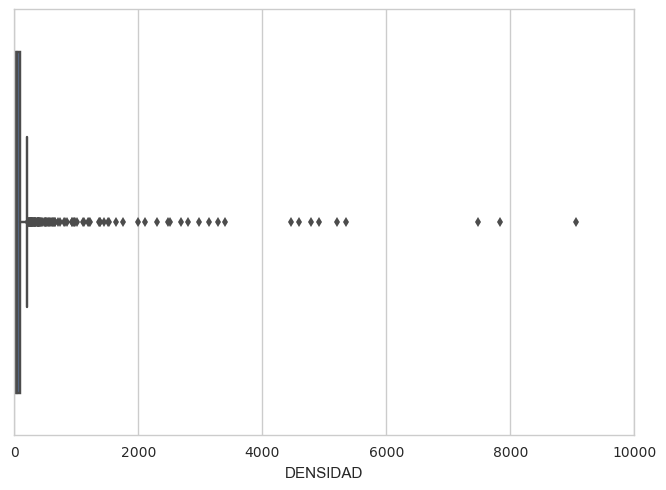

In [77]:
%matplotlib
import seaborn as sns
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_municipios["DENSIDAD"])

In [35]:
df.columns

Index(['ID', 'base_reguladora', 'convocatoria', 'consejeria', 'organo_gestor',
       'tipo_subvencion', 'programa', 'denominacion_programa', 'importe',
       'finalidad', 'id_beneficiario', 'nombre_beneficiario',
       'fecha_concesion', 'partida_pres'],
      dtype='object', name=0)

Otras fuentes para comparar
http://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=1ebec7cdeab81510VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD